In [2]:
import json
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
files = glob.glob("../data/cnn_size=*.json")

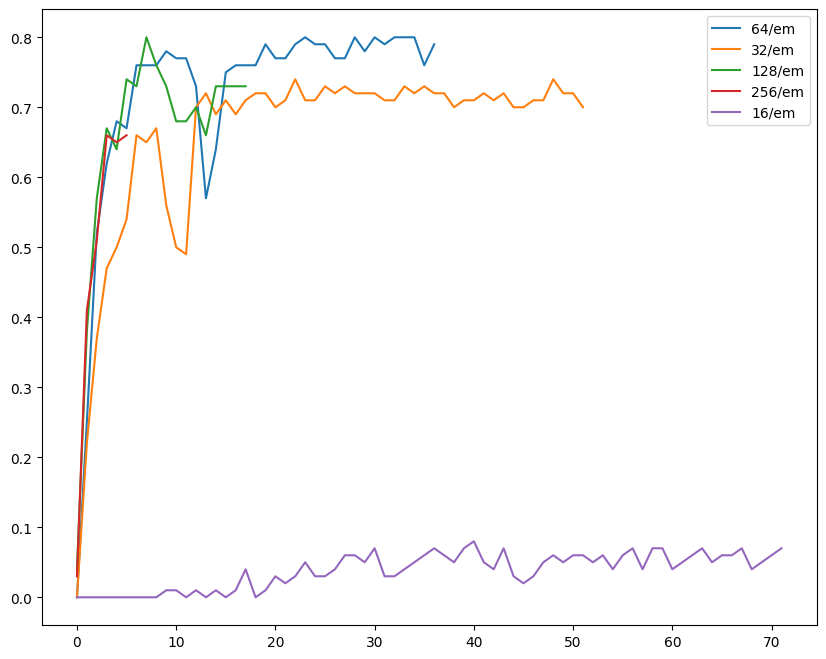

In [6]:
plt.figure(figsize=(10,8))
legends = []
for path in files:
    with open(path, "rb") as f:
        data = json.load(f)
    size = path.split("=")[1].split(".")[0]
    losses = data["loss"]
    f1 = data["f1"]
    em = data["em"]
    train_losses = data["train_losses"]
    # plt.plot(f1, label="f1")
    plt.plot(em, label="em")
    legends.extend([f"{size}/em"])
plt.legend(legends)

In [7]:
dfs = pd.DataFrame(columns=["size", "metric", "value"])
for path in files:
    with open(path, "rb") as f:
        data = json.load(f)
    size = path.split("=")[1].split(".")[0]
    f1 = data["f1"]
    em = data["em"]
    train_loss = data["train_losses"]
    loss = data["loss"]
    dfs = pd.concat([dfs, pd.DataFrame({"size": [size] * len(f1), "metric": ["f1"] * len(f1), "value": f1})])
    dfs = pd.concat([dfs, pd.DataFrame({"size": [size] * len(em), "metric": ["em"] * len(em), "value": em})])
    dfs = pd.concat([dfs, pd.DataFrame({"size": [size] * len(train_loss), "metric": ["train_loss"] * len(train_loss), "value": train_loss})])
    dfs = pd.concat([dfs, pd.DataFrame({"size": [size] * len(loss), "metric": ["val_loss"] * len(loss), "value": loss})])

In [8]:
# remove size 16
dfs = dfs[dfs["size"] != "16"]

In [9]:
# function for getting unique sizes ordered
def get_sizes(dfs):
    sizes = dfs["size"].unique()
    sizes = [int(s) for s in sizes]
    sizes.sort()
    sizes = [str(s) for s in sizes]
    return sizes

In [10]:
times2size = {}
max_time = 10 * 60
for size in get_sizes(dfs):
    epochs = len(dfs[(dfs["size"] == size) & (dfs["metric"] == "em")])
    times2size[size] = np.linspace(0, max_time, epochs)

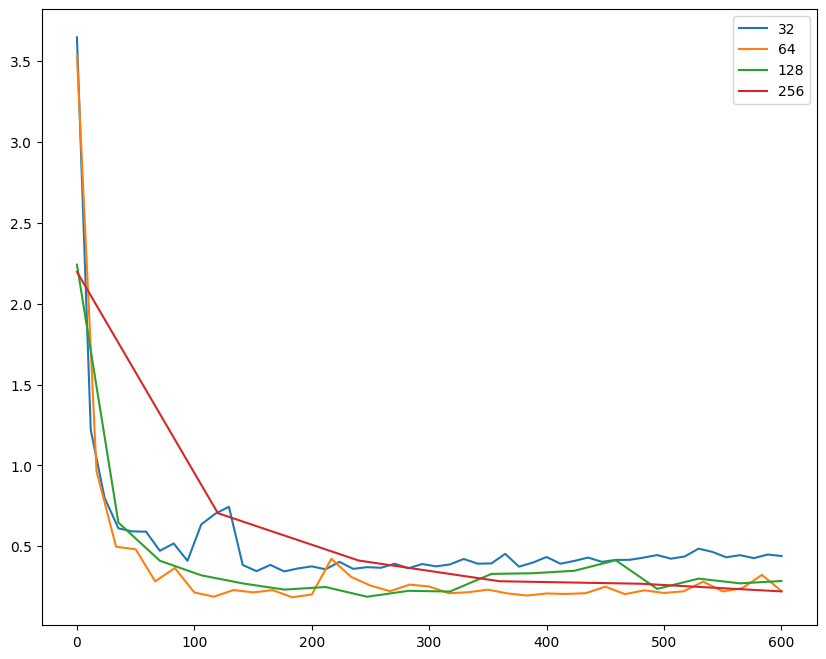

In [11]:
# plotting val_loss
plt.figure(figsize=(10,8))
legends = []    
for size in get_sizes(dfs):
    plt.plot(times2size[size], dfs[(dfs["size"] == size) & (dfs["metric"] == "val_loss")]["value"].values)
    legends.extend([size])
plt.legend(legends)

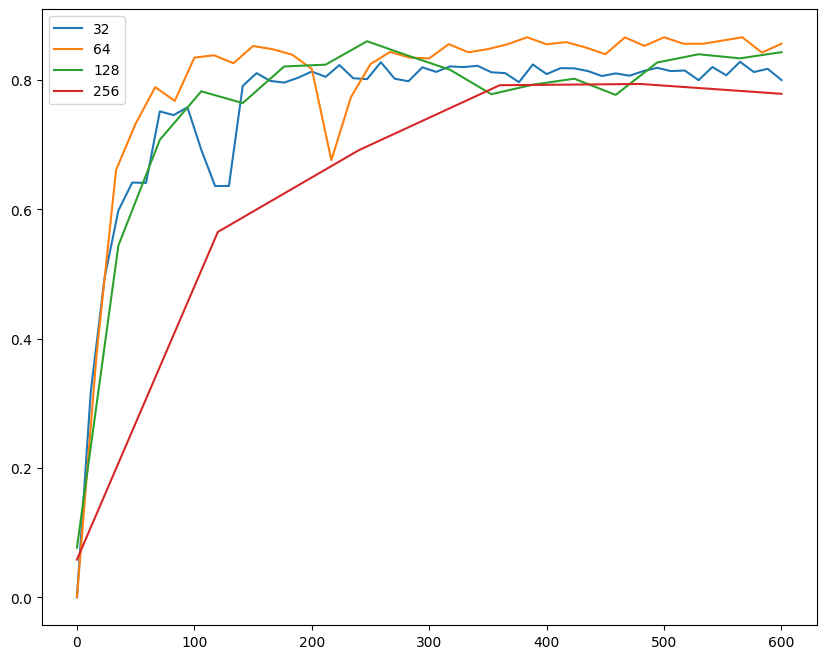

In [12]:
# plotting f1
plt.figure(figsize=(10,8))
legends = []
for size in get_sizes(dfs):
    plt.plot(times2size[size], dfs[(dfs["size"] == size) & (dfs["metric"] == "f1")]["value"].values)
    legends.extend([size])
plt.legend(legends)

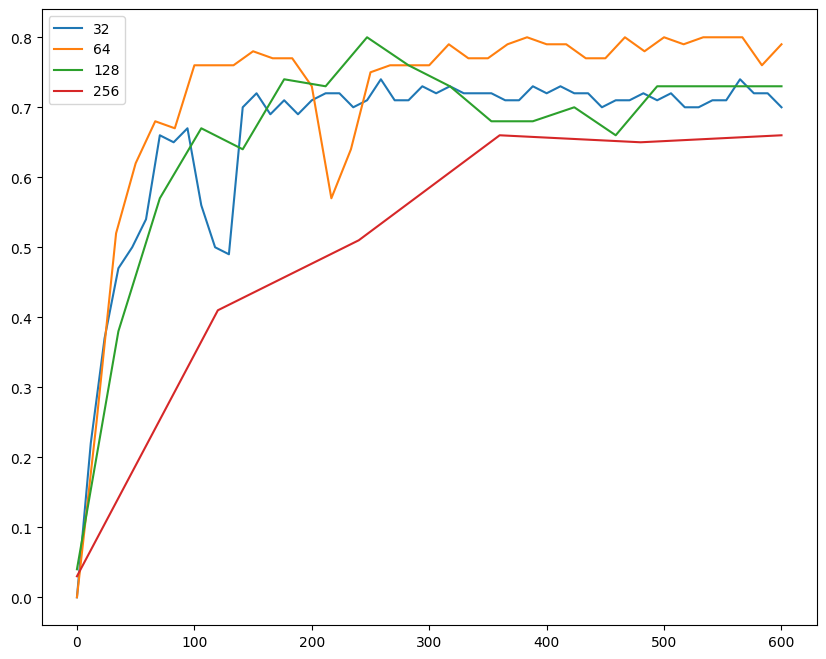

In [13]:
# plotting em
plt.figure(figsize=(10,8))
legends = []
for size in get_sizes(dfs):
    plt.plot(times2size[size], dfs[(dfs["size"] == size) & (dfs["metric"] == "em")]["value"].values)
    legends.extend([size])
plt.legend(legends)


In [14]:
times2size_trainloss = {}
max_time = 10 * 60
for size in get_sizes(dfs):
    epochs = len(dfs[(dfs["size"] == size) & (dfs["metric"] == "train_loss")]["value"].rolling(20).mean().values)
    times2size_trainloss[size] = np.linspace(0, max_time, epochs)

(0.0, 4.0)

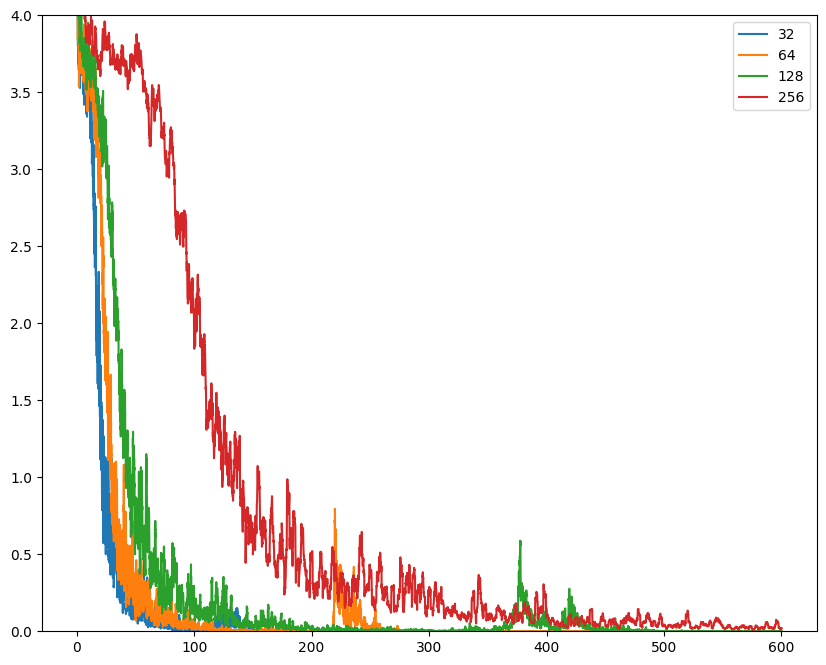

In [15]:
# plotting smoothed train_loss and limit y to 4
plt.figure(figsize=(10,8))
legends = []
for size in get_sizes(dfs):
    plt.plot(times2size_trainloss[size], dfs[(dfs["size"] == size) & (dfs["metric"] == "train_loss")]["value"].rolling(20).mean().values)
    legends.extend([size])
plt.legend(legends)
plt.ylim(0, 4)